In [11]:
import numpy as np
import matplotlib.pyplot as plt
from get_online_results import EvaluatorOnline
from get_offline_results import EvaluatorOffline

XSMALL_SIZE = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [21]:
# onlne
dir_ = "../../results/"
data_names = ["BNG_wisconsin", "BNG_cpu_act", "BNG_auto_price", "black_friday", "ds_5", "zurich"]

bars_cats = [0] * len(data_names)
bars_tree = [0] * len(data_names)
bars_lin = [0] * len(data_names)
y_cats = [ [0] * len(data_names) for i in range(2) ]
y_tree = [ [0] * len(data_names) for i in range(2) ]
y_lin = [ [0] * len(data_names) for i in range(2) ]

for i, name in enumerate(data_names):
    print(name)
    if (i != 2 and i != 4):
        data_file = dir_ + name + "_online_validation.txt"
        online_results = EvaluatorOnline(data_file, 0.05, True)
        online_results.eval()
        bars_cats[i], y_cats[0][i], y_cats[1][i] = online_results.return_loss("cats")
        bars_tree[i], y_tree[0][i], y_tree[1][i] = online_results.return_loss("disc_tree")
        bars_lin[i], y_lin[0][i], y_lin[1][i] = online_results.return_loss("disc_linear")


BNG_wisconsin
BNG_cpu_act
BNG_auto_price
black_friday
ds_5
zurich
error in model=cats, n=16.0, h=4.0


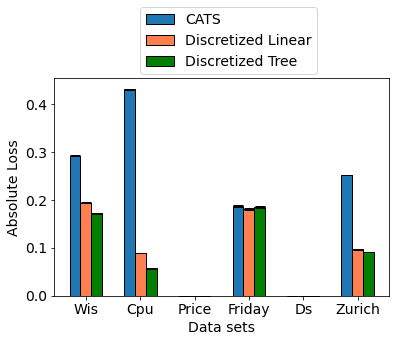

In [22]:
# online
# width of the bars
barWidth = 0.2
 
yer_cats = (list(np.subtract(bars_cats, y_cats[0]).transpose()), list(np.subtract(y_cats[1], bars_cats).transpose()))
yer_tree = (list(np.subtract(bars_tree, y_tree[0]).transpose()), list(np.subtract(y_tree[1], bars_tree).transpose()))
yer_lin = (list(np.subtract(bars_lin, y_lin[0]).transpose()), list(np.subtract(y_lin[1], bars_lin).transpose()))

# The x position of bars
r1 = np.arange(len(bars_cats))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars_cats, width = barWidth, edgecolor = 'black', yerr=yer_cats, capsize=5, label='CATS')
 
# Create cyan bars
plt.bar(r2, bars_tree, width = barWidth, color = 'coral', edgecolor = 'black', yerr=yer_tree, capsize=5, label='Discretized Linear')

# Create red bars
plt.bar(r3, bars_lin, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer_lin, capsize=5, label='Discretized Tree')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars_cats))], ['Wis', 'Cpu','Price','Friday', 'Ds', 'Zurich'])
plt.ylabel('Absolute Loss')
plt.xlabel('Data sets')
plt.legend(loc='upper center', bbox_to_anchor= (0.52, 1.36))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'abs_online.png',bbox_inches='tight')

In [ ]:
# offline
dir_ = "../../results/"
data_names = ["BNG_wisconsin", "BNG_cpu_act", "BNG_auto_price", "black_friday", "ds_5", "zurich"]

bars_init = [0] * len(data_names)
bars_opt = [0] * len(data_names)
y_init = [ [0] * len(data_names) for i in range(2) ]
y_opt = [ [0] * len(data_names) for i in range(2) ]

for i, name in enumerate(data_names):
    print(name)
    if (i != 2 and i != 4):
        srm_file = dir_ + name + "_offline_srm.txt"
        test_file = dir_ + name + "_offline_test.txt"
        offline_results = EvaluatorOffline(srm_file, test_file, 0.05, True)
        offline_results.eval()
        bars_init[i], y_init[0][i], y_init[1][i] = offline_results.return_loss("init")
        bars_opt[i], y_opt[0][i], y_opt[1][i] = offline_results.return_loss("opt")


In [ ]:
# offline
# width of the bars
barWidth = 0.2

yer_init = (list(np.subtract(bars_init, y_init[0]).transpose()), list(np.subtract(y_init[1], bars_init).transpose()))
yer_opt = (list(np.subtract(bars_opt, y_opt[0]).transpose()), list(np.subtract(y_opt[1], bars_opt).transpose()))

# The x position of bars
r1 = np.arange(len(bars_init))
r2 = [x + 1.5*barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars_init, width = barWidth, color = 'tomato', edgecolor = 'black', yerr=yer_init, capsize=5, label='Initial model')
 
# Create cyan bars
plt.bar(r2, bars_opt, width = barWidth, color = 'slateblue', edgecolor = 'black', yerr=yer_opt, capsize=5, label='Off-policy optimization model')


# general layout
plt.xticks([r + barWidth for r in range(len(bars_init))], ['Wis', 'Cpu','Price','Friday', 'Ds', 'Zurich'])
plt.ylabel('Absolute Loss')
plt.xlabel('Data sets')
plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1.27))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'abs_offline_srm.png',bbox_inches='tight')

[4.0, 8.0, 16.0]


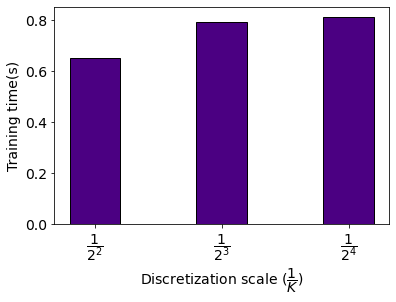

In [36]:
# time 1
# width of the bars
barWidth = 0.4
 
name = "black_friday"
n = 0
h = 1
data_file = dir_ + name + "_online_validation.txt"
online_results = EvaluatorOnline(data_file, 0.05, True)
online_results.eval()
bars1, k_ = online_results.getTime("cats", n, h)
print(k_)
 
# The x position of bars
r1 = np.arange(len(bars1))

# Create blue bars
plt.bar(r1+barWidth, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', label='Time(s)')
 

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['$\dfrac{1}{2^2}$','$\dfrac{1}{2^3}$','$\dfrac{1}{2^4}$','$\dfrac{1}{2^5}$','$\dfrac{1}{2^6}$','$\dfrac{1}{2^7}$','$\dfrac{1}{2^8}$','$\dfrac{1}{2^9}$'])
plt.ylabel('Training time(s)')
plt.xlabel('Discretization scale ($\dfrac{1}{K}$)')
# plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1.18))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'timen.png',bbox_inches='tight')

[ 0.0625  0.125   0.25  ]


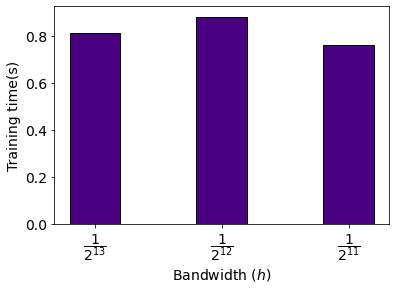

In [37]:
# time 2
# width of the bars
barWidth = 0.4

name = "black_friday"
n = 16
h = 0
data_file = dir_ + name + "_online_validation.txt"
online_results = EvaluatorOnline(data_file, 0.05, True)
online_results.eval()
bars1, h_ = online_results.getTime("cats", n, h)
print(h_ / (np.ones(len(h_)) * n))
 
# The x position of bars
r1 = np.arange(len(bars1))

# Create blue bars
plt.bar(r1+barWidth, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', label='Time(s)')
 

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['$\dfrac{1}{2^{13}}$','$\dfrac{1}{2^{12}}$','$\dfrac{1}{2^{11}}$','$\dfrac{1}{2^{10}}$','$\dfrac{1}{2^{9}}$','$\dfrac{1}{2^{8}}$','$\dfrac{1}{2^{7}}$','$\dfrac{1}{2^{6}}$'])
plt.ylabel('Training time(s)')
plt.xlabel('Bandwidth ($h$)')
# plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig('timeh.png',bbox_inches='tight')

[4.0, 8.0, 16.0]
[2.0, 4.0, 8.0]


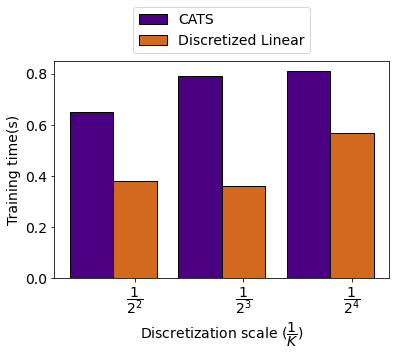

In [38]:
# time 3 
# width of the bars
barWidth = 0.4

name = "black_friday"
n = 0
h = 1
data_file = dir_ + name + "_online_validation.txt"
online_results = EvaluatorOnline(data_file, 0.05, True)
online_results.eval()
bars1, k_ = online_results.getTime("cats", n, h)
print(k_)
n = 0
h = 0
bars2, k_2 = online_results.getTime("disc_linear", n, h)
print(k_2)


# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', label='CATS')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'chocolate', edgecolor = 'black', label='Discretized Linear')


# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['$\dfrac{1}{2^2}$','$\dfrac{1}{2^3}$','$\dfrac{1}{2^4}$','$\dfrac{1}{2^5}$','$\dfrac{1}{2^6}$','$\dfrac{1}{2^7}$','$\dfrac{1}{2^8}$','$\dfrac{1}{2^9}$'
                                                      ,'$\dfrac{1}{2^{10}}$','$\dfrac{1}{2^{11}}$','$\dfrac{1}{2^{12}}$'])
plt.ylabel('Training time(s)')
plt.xlabel('Discretization scale ($\dfrac{1}{K}$)')
plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1.28))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig('timenn.png',bbox_inches='tight')